# Step0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Step1: Read Data

In [2]:
df = pd.read_csv('adult.csv')

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Step2: Data Analysis

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Step3: Categorical

In [11]:
df_num = df.select_dtypes(exclude='object') 
df_obj = df.select_dtypes(include='object')

In [12]:
df_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [13]:
df_obj

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [16]:
df_obj = pd.get_dummies(df_obj, drop_first=True)

In [19]:
df = pd.concat([df_num, df_obj], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Columns: 101 entries, age to income_ >50K
dtypes: bool(95), int64(6)
memory usage: 4.4 MB


In [22]:
df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       ...
       'native_country_ Puerto-Rico', 'native_country_ Scotland',
       'native_country_ South', 'native_country_ Taiwan',
       'native_country_ Thailand', 'native_country_ Trinadad&Tobago',
       'native_country_ United-States', 'native_country_ Vietnam',
       'native_country_ Yugoslavia', 'income_ >50K'],
      dtype='object', length=101)

# Step4: X, y

In [23]:
X = df.drop('income_ >50K', axis=1)

y = df['income_ >50K']

In [24]:
X.shape, y.shape

((32560, 100), (32560,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22792, 100), (9768, 100), (22792,), (9768,))

# Step5: Scaling

In [27]:
scaler = RobustScaler()

In [28]:
scaler.fit(X_train)

RobustScaler()

In [29]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Step6: Naive Bayes

In [30]:
g = GaussianNB()

In [32]:
g.fit(X_train, y_train)

GaussianNB()

In [34]:
(g.var_).shape

(2, 100)

In [35]:
y_pred = g.predict(X_test)

In [36]:
y_pred

array([False,  True,  True, ..., False, False, False], shape=(9768,))

In [37]:
accuracy_score(y_test, y_pred)

0.8276003276003276

In [38]:
cm = confusion_matrix(y_test, y_pred)

In [39]:
cm

array([[6303, 1092],
       [ 592, 1781]])

<Axes: >

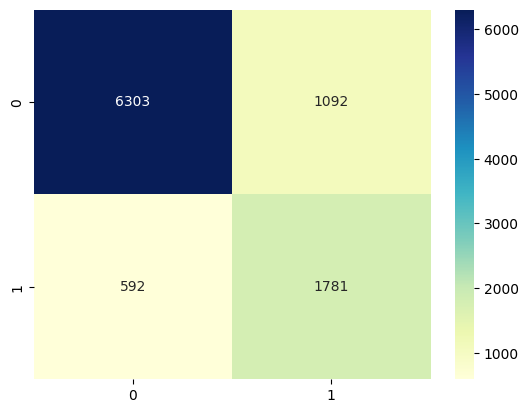

In [40]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices 

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.85      0.88      7395
        True       0.62      0.75      0.68      2373

    accuracy                           0.83      9768
   macro avg       0.77      0.80      0.78      9768
weighted avg       0.84      0.83      0.83      9768



In [44]:
df['income_ >50K'].value_counts()

income_ >50K
False    24719
True      7841
Name: count, dtype: int64